In [1]:
import matplotlib.pyplot as plt

In [2]:
import h5py as h5

In [3]:
from deoxys.model import load_model, model_from_full_config
from deoxys.utils import read_file, load_json_config
from deoxys.data.preprocessor import WindowingPreprocessor

In [4]:
config = read_file('../examples/json/unet-sample-config.json')
config = load_json_config(config)
# Make some change in the path
config['dataset_params'] = {} #['config']['filename'] = '../../../full_dataset_single.h5'

In [5]:
model = model_from_full_config(config, weights_file='../model3.h5')

In [6]:
hf = h5.File('../../../full_dataset_single.h5', 'r')

In [7]:
hf['fold_11'].keys()

<KeysViewHDF5 ['input', 'patient_idx', 'slice_idx', 'target']>

In [8]:
hf['fold_11']['patient_idx'][:42]

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [9]:
hf['fold_11']['slice_idx'][:42]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41])

In [10]:
images = hf['fold_11']['input'][:42]

In [11]:
masks = hf['fold_11']['target'][:42]

In [12]:
preprocessor = WindowingPreprocessor(70 + 1024, 200, 0)
images_, masks = preprocessor.transform(images, masks)

In [13]:
predicted = model.predict(images_, verbose=1)

42/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

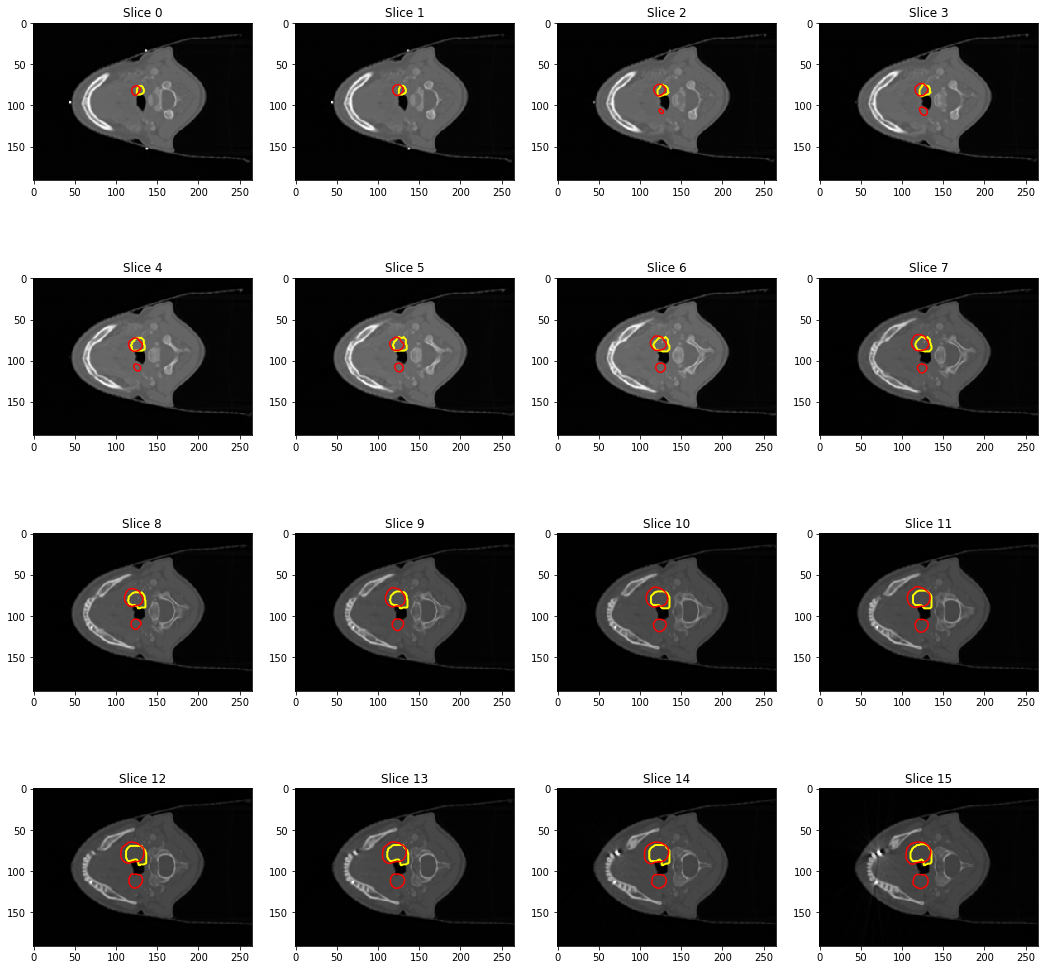

In [14]:
f, axes = plt.subplots(4, 4, figsize=(18,18))
ax_i = 0
for i in range(16):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

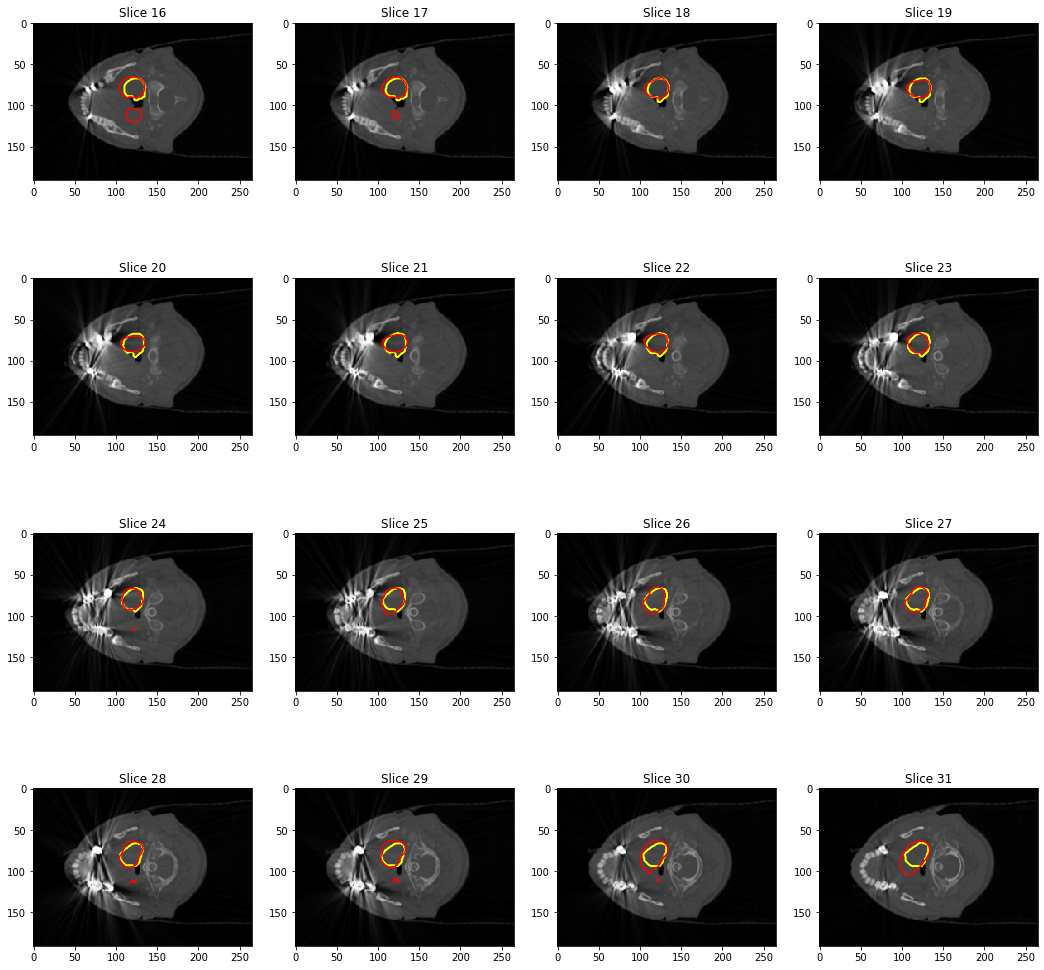

In [15]:
f, axes = plt.subplots(4, 4, figsize=(18,18))
ax_i = 0
for i in range(16, 32):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

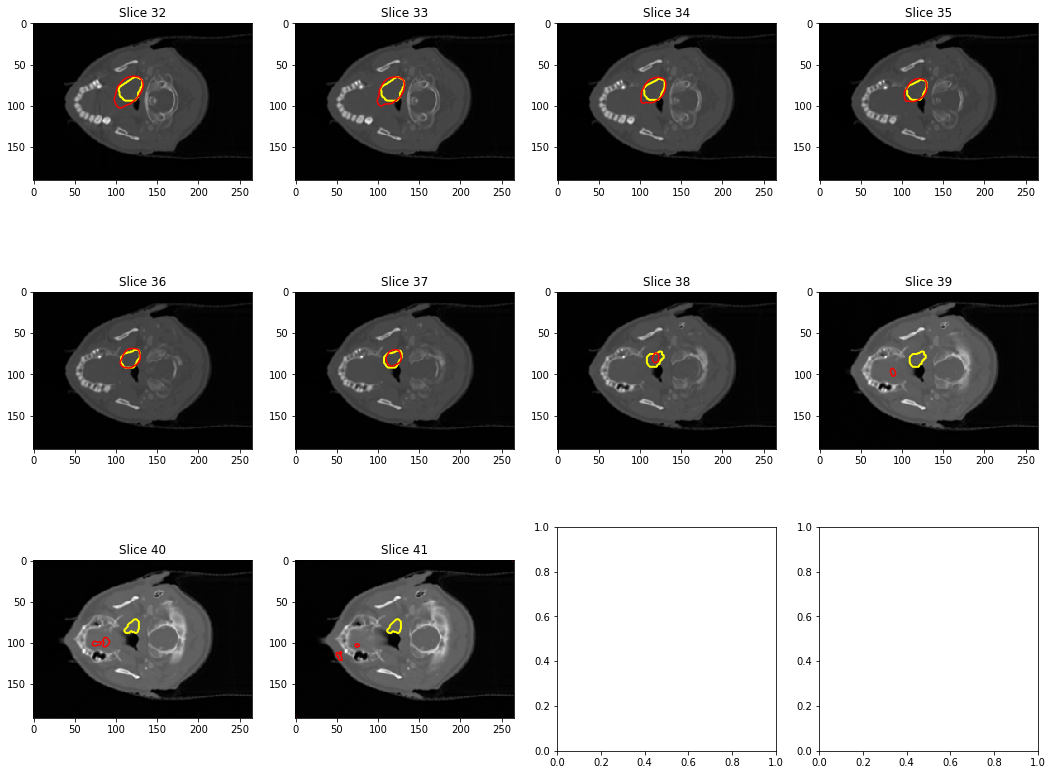

In [16]:
f, axes = plt.subplots(3, 4, figsize=(18,14))
ax_i = 0
for i in range(32, 42):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

In [17]:
hf['fold_11']['patient_idx'][42:198]

array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8])

In [18]:
hf['fold_11']['slice_idx'][42:198]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155])

In [19]:
images = hf['fold_11']['input'][42:198]
masks = hf['fold_11']['target'][42:198]
preprocessor = WindowingPreprocessor(70 + 1024, 200, 0)
images_, masks = preprocessor.transform(images, masks)

In [20]:
predicted = model.predict(images_, verbose=1)

156/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

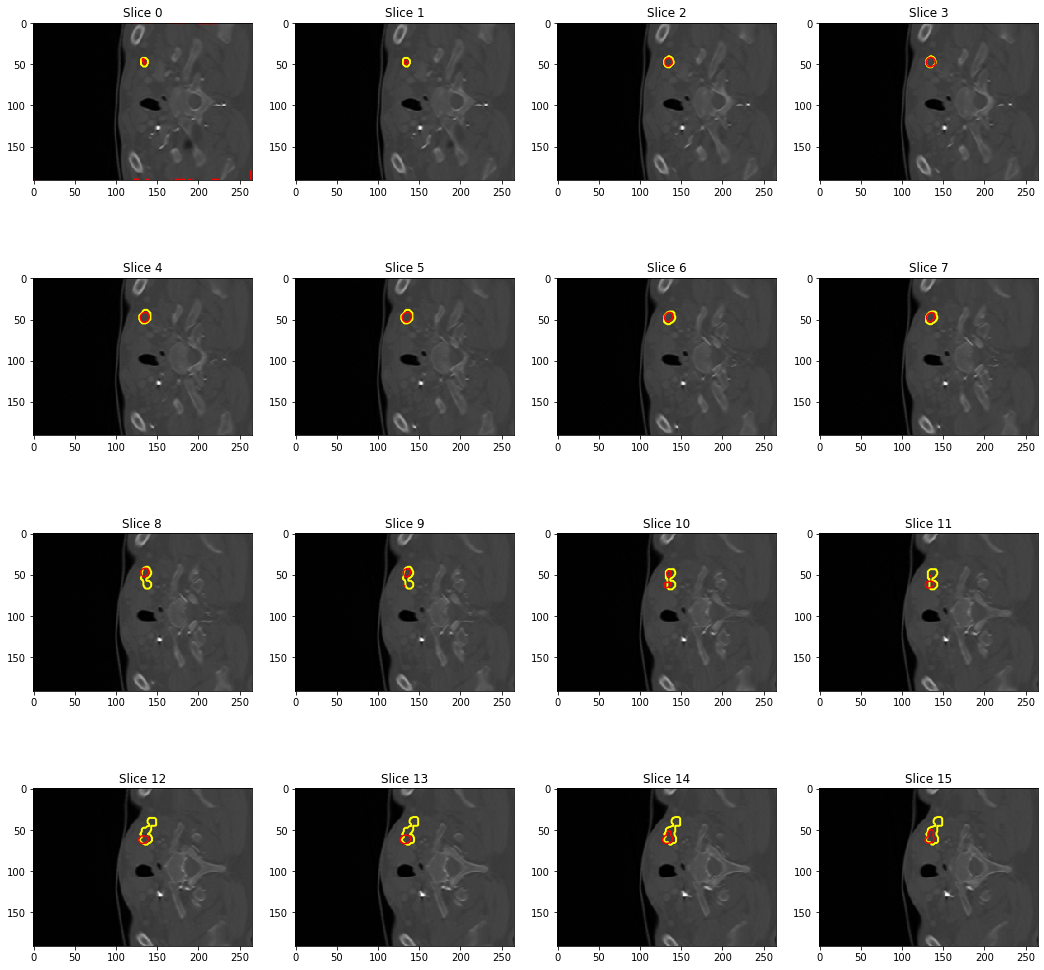

In [21]:
f, axes = plt.subplots(4, 4, figsize=(18,18))
ax_i = 0
for i in range(16):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

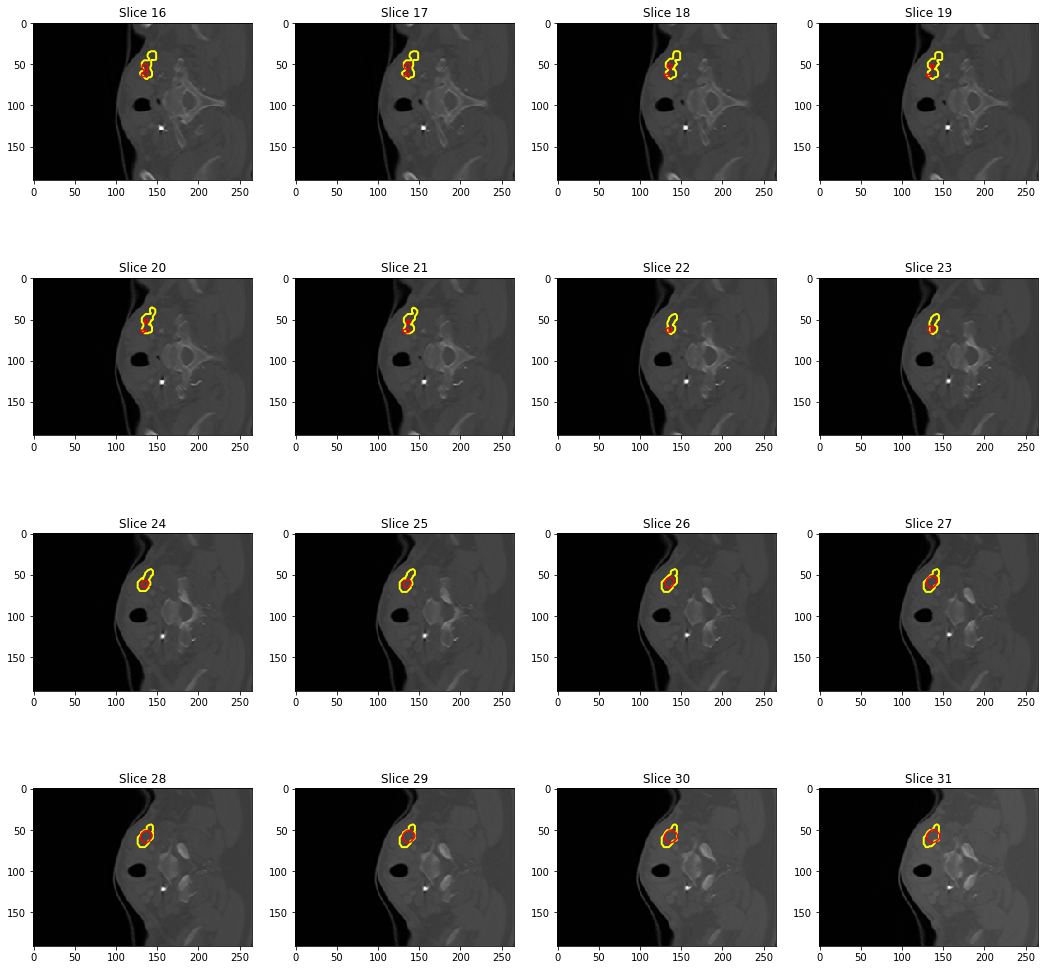

In [22]:
f, axes = plt.subplots(4, 4, figsize=(18,18))
ax_i = 0
for i in range(16,32):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

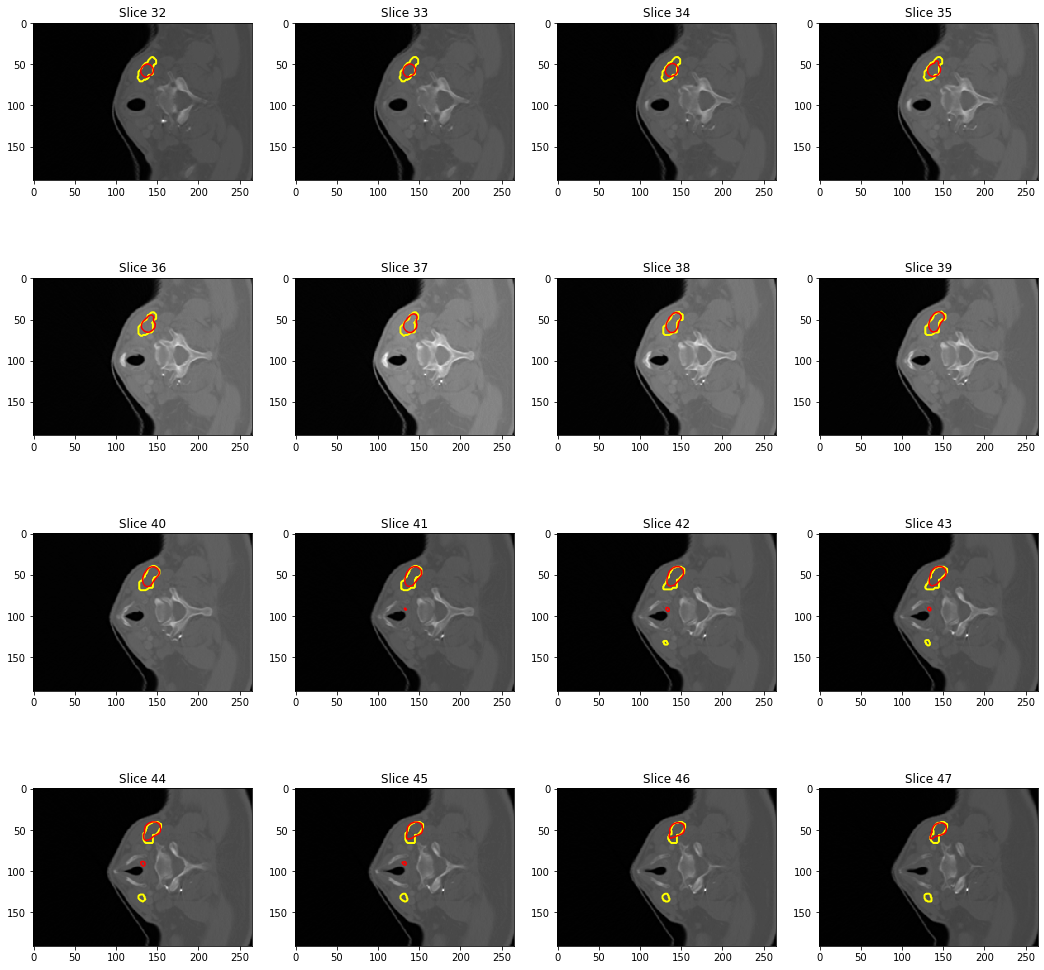

In [23]:
f, axes = plt.subplots(4, 4, figsize=(18,18))
ax_i = 0
for i in range(32, 48):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

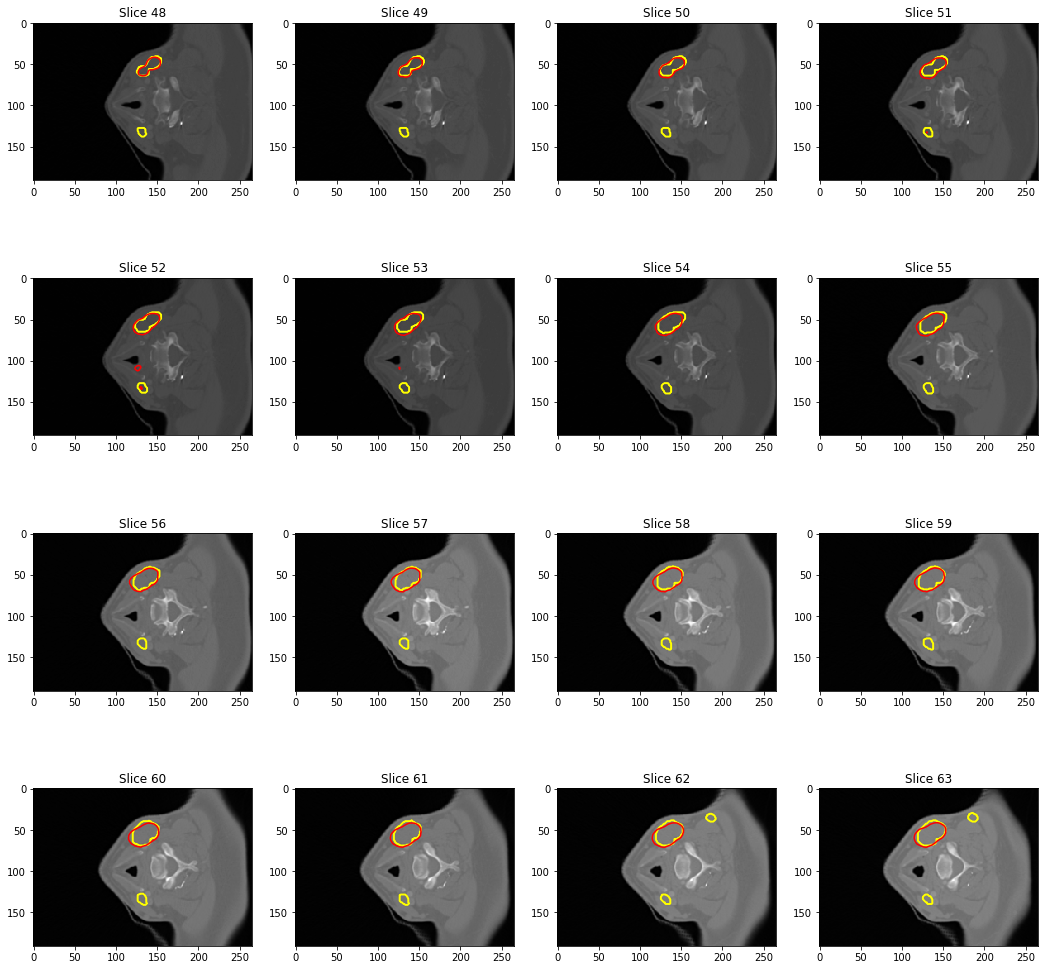

In [24]:
f, axes = plt.subplots(4, 4, figsize=(18,18))
ax_i = 0
for i in range(48, 64):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

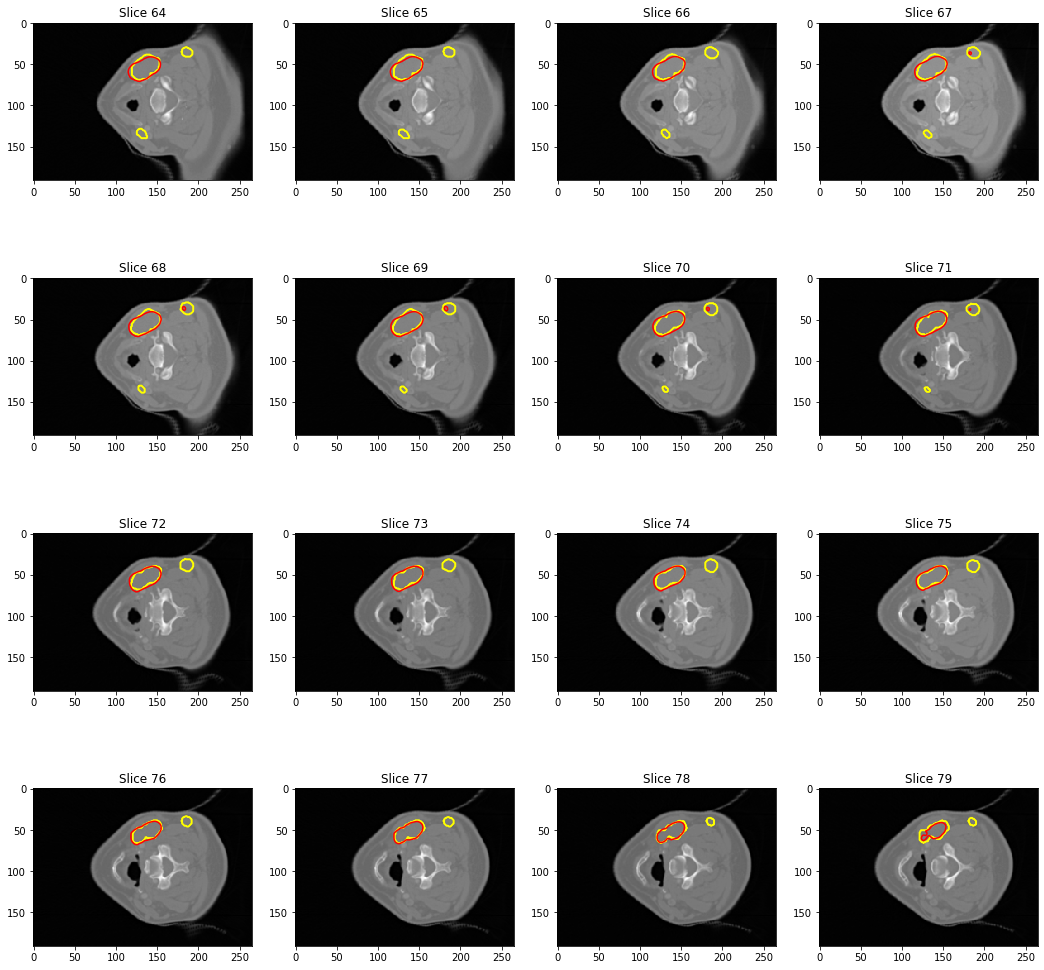

In [25]:
f, axes = plt.subplots(4, 4, figsize=(18,18))
ax_i = 0
for i in range(64, 80):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

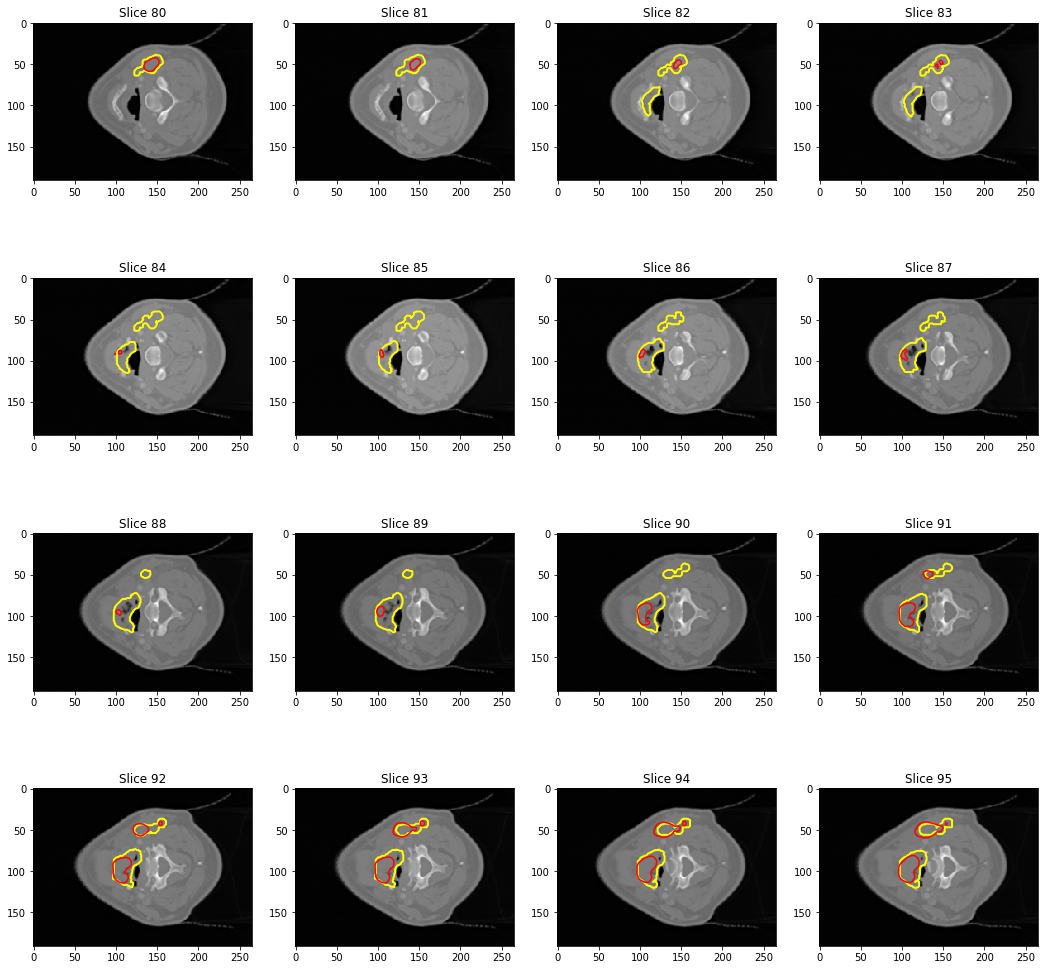

In [26]:
f, axes = plt.subplots(4, 4, figsize=(18,18))
ax_i = 0
for i in range(80, 96):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

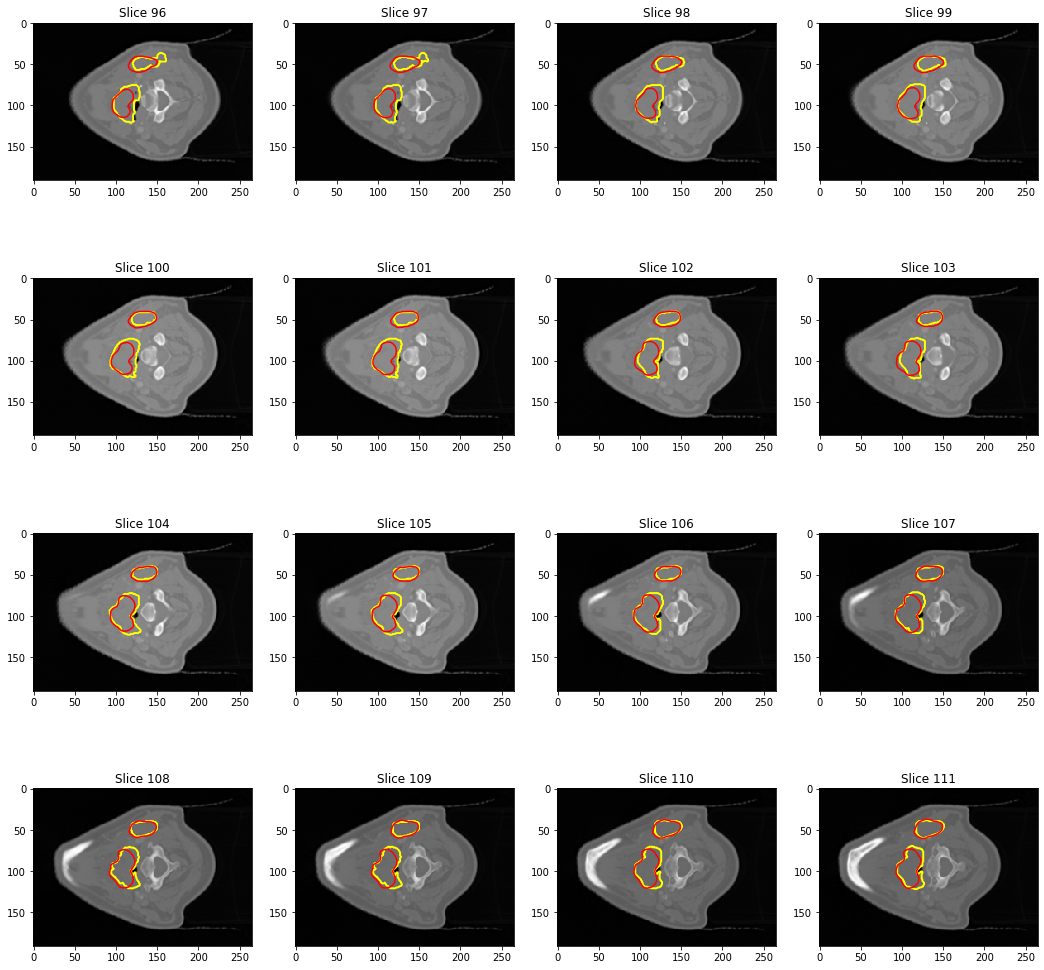

In [27]:
f, axes = plt.subplots(4, 4, figsize=(18,18))
ax_i = 0
for i in range(96, 112):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

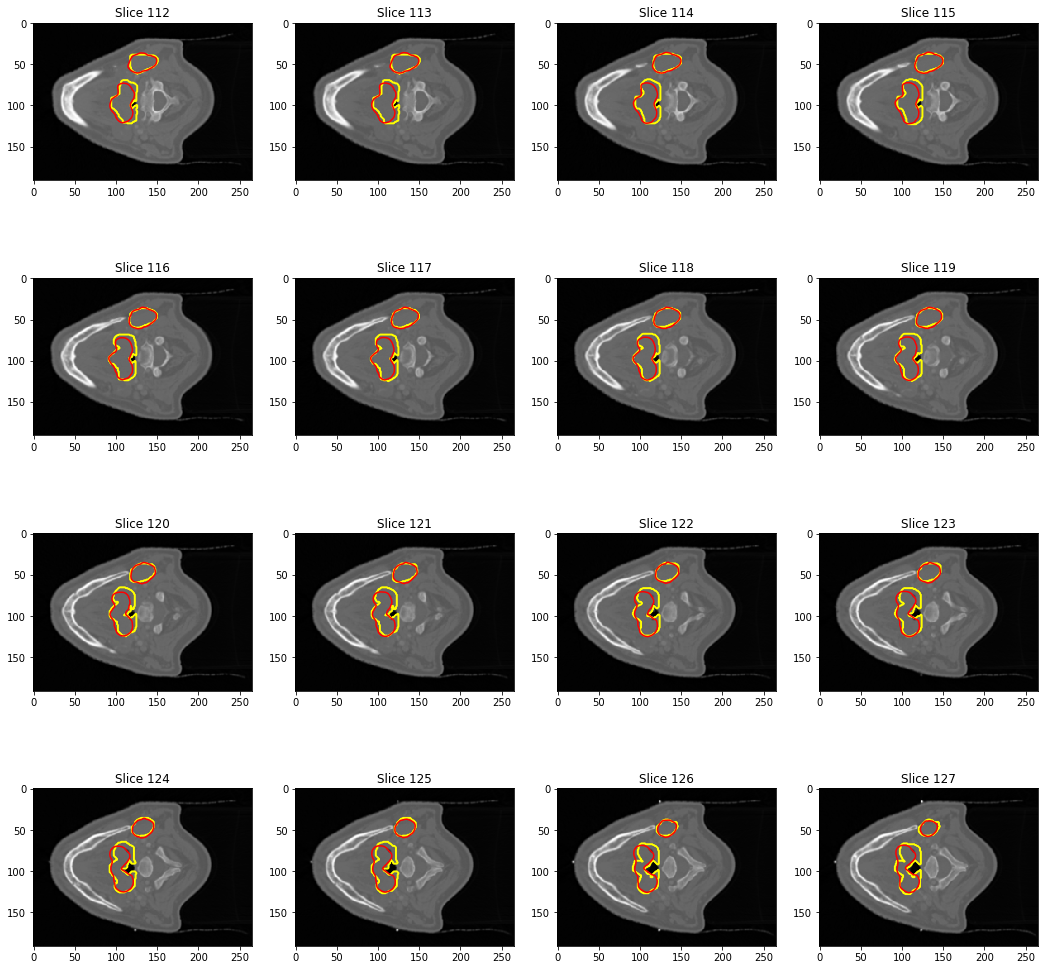

In [28]:
f, axes = plt.subplots(4, 4, figsize=(18,18))
ax_i = 0
for i in range(112, 128):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

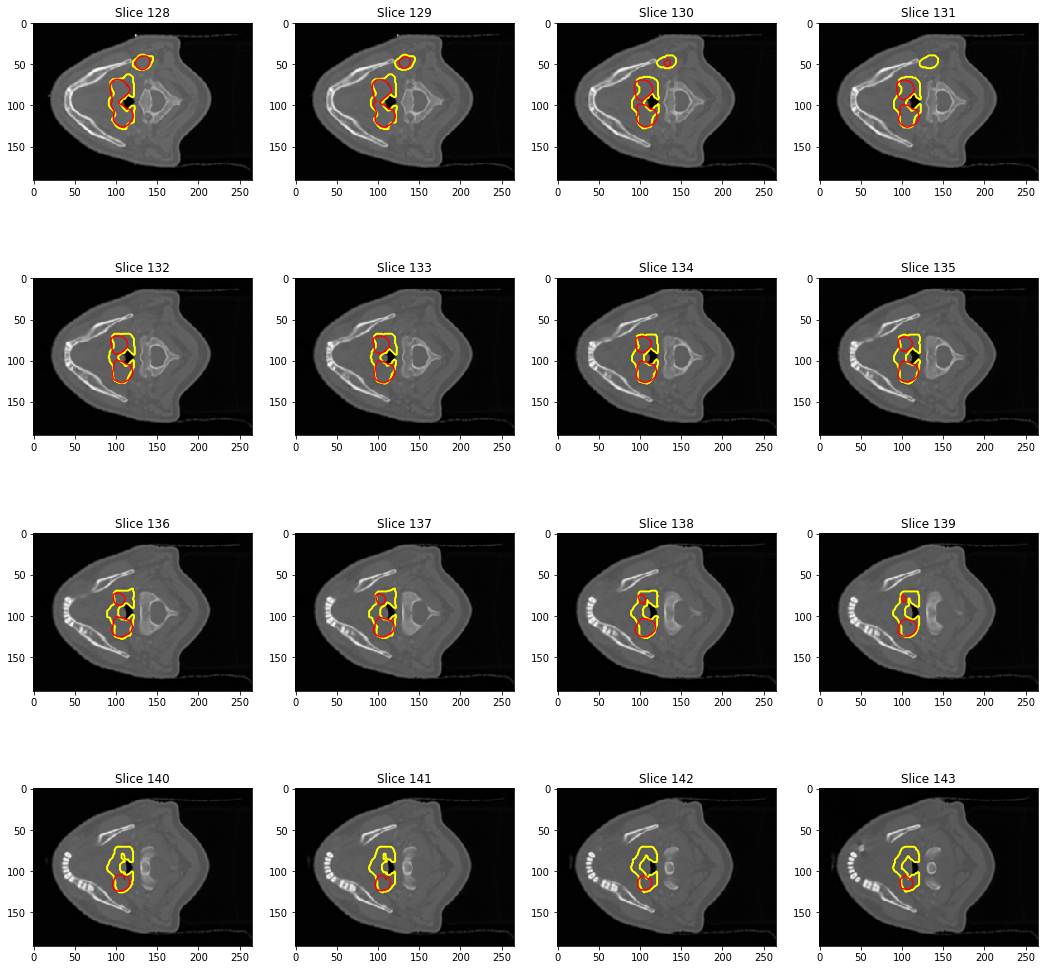

In [29]:
f, axes = plt.subplots(4, 4, figsize=(18,18))
ax_i = 0
for i in range(128, 144):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

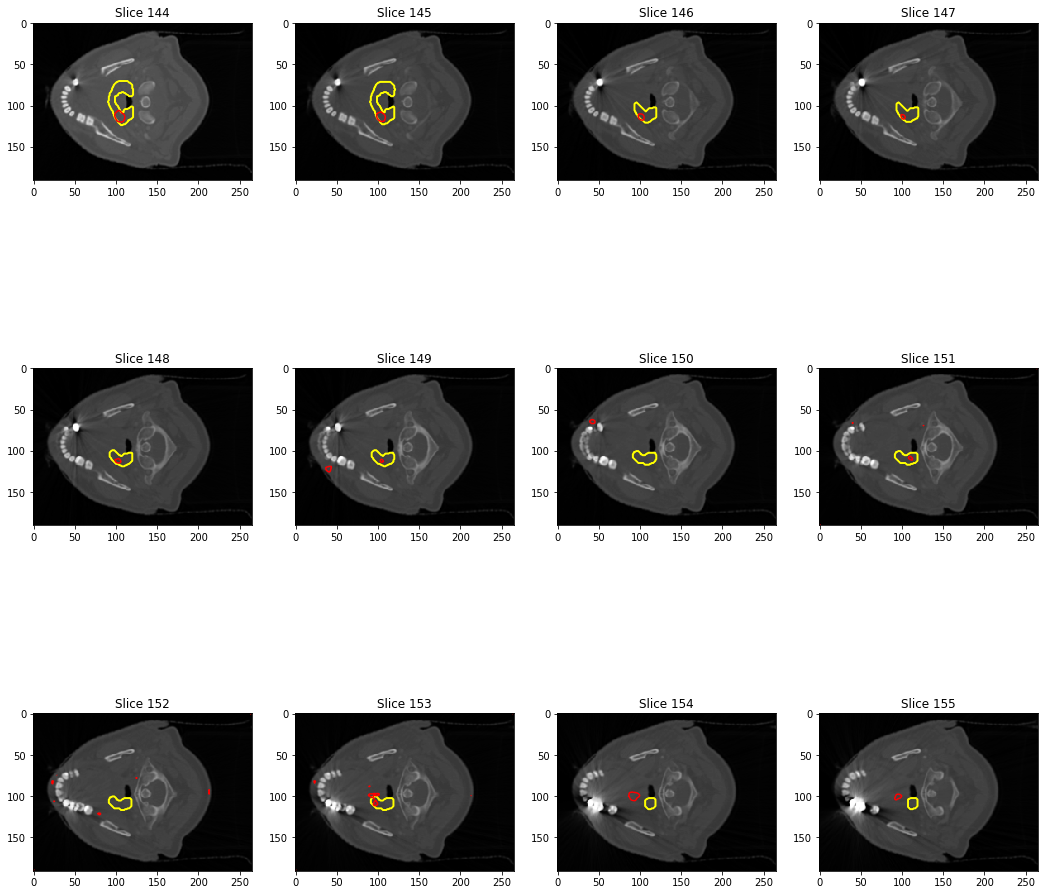

In [30]:
f, axes = plt.subplots(3, 4, figsize=(18,18))
ax_i = 0
for i in range(144, 156):
    ax = axes[ax_i//4][ax_i%4]
    ax.imshow(images[i][..., 0], 'gray')
    ax.contour(masks[i][..., 0], 1, colors='yellow')
    ax.contour(predicted[i][..., 0], 1, colors='red')
    ax.set_title(f"Slice {i}")
    ax_i+=1

In [90]:
# config = read_file('../examples/json/unet-sample-config.json')
# config = load_json_config(config)
# # Make some change in the path
# config['dataset_params']['config']['filename'] = '../../../full_dataset_single.h5'
# model = model_from_full_config(config, weights_file='../model2.h5')

In [91]:
# datagen = model._data_reader.test_generator.generate()

In [92]:
# image, mask = next(datagen)

In [93]:
# predicted = model.predict(image, verbose=1)

4/1 [========================================================================================================================] - 4s 1s/sample


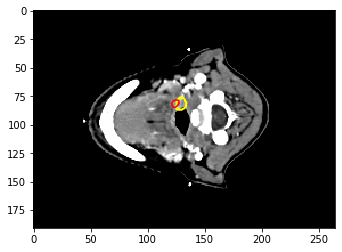

In [94]:
# plt.imshow(image[0][..., 0], 'gray')
# plt.contour(mask[0][..., 0], 1, colors='yellow')
# plt.contour(predicted[0][..., 0], 1, colors='red')

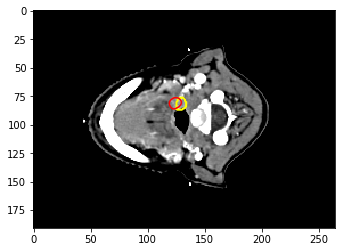

In [95]:
# plt.imshow(image[1][..., 0], 'gray')
# plt.contour(mask[1][..., 0], 1, colors='yellow')
# plt.contour(predicted[1][..., 0], 1, colors='red')

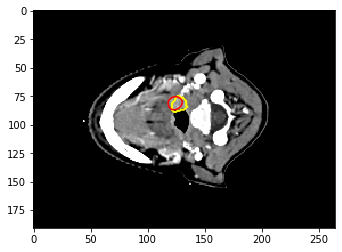

In [96]:
plt.imshow(image[2][..., 0], 'gray')
plt.contour(mask[2][..., 0], 1, colors='yellow')
plt.contour(predicted[2][..., 0], 1, colors='red')

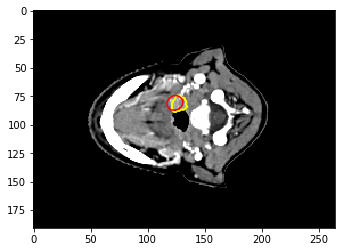

In [97]:
# plt.imshow(image[3][..., 0], 'gray')
# plt.contour(mask[3][..., 0], 1, colors='yellow')
# plt.contour(predicted[3][..., 0], 1, colors='red')

In [99]:
# image[0] == images[0]

array([[[False,  True],
        [False,  True],
        [False,  True],
        ...,
        [False,  True],
        [False,  True],
        [False,  True]],

       [[False,  True],
        [False,  True],
        [False,  True],
        ...,
        [False,  True],
        [False,  True],
        [False,  True]],

       [[False,  True],
        [False,  True],
        [False,  True],
        ...,
        [False,  True],
        [False,  True],
        [False,  True]],

       ...,

       [[False,  True],
        [False,  True],
        [False,  True],
        ...,
        [False,  True],
        [False,  True],
        [False,  True]],

       [[False,  True],
        [False,  True],
        [False,  True],
        ...,
        [False,  True],
        [False,  True],
        [False,  True]],

       [[False,  True],
        [False,  True],
        [False,  True],
        ...,
        [False,  True],
        [False,  True],
        [False,  True]]])